# Data Collection and CSV Creation + Cleaning

In [36]:
# Import Libraries needed
import pandas as pd
import matplotlib.pyplot as plt


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

### Get the Data from Johannesfriedrich on Github! Thanks for Providing them in JSON Format and always refresh the Set 

- There are 2 Version of the Data you can get i will load data_json and do my own Data Cleaning and EDA
- The first Version seems not to have the "Superzahl" thats why i clean and Shape the Data by myself

In [45]:
data_json_1 = "https://johannesfriedrich.github.io/LottoNumberArchive/Lottonumbers_tidy_complete.json"
data_json = "https://johannesfriedrich.github.io/LottoNumberArchive/Lottonumbers_complete.json"

In [46]:

# read in the json file from the provided URL
df = pd.read_json(data_json)

### Normalize the data because only 1 column "data" which holds dictionaries

In [47]:
# normalize the json file into columns

df = pd.json_normalize(df['data'])

### Superzahl was Introduced in the 2000's so i will make a 2nd Dataframe only with drawings which contained the Superzahl

In [49]:
df_superzahl = df.dropna(subset=["Superzahl"])


In [59]:
lotto_numbers = df["Lottozahl"].explode().astype(int)
number_counts = lotto_numbers.value_counts().sort_values(ascending=False)

# Count the occurrences of each Superzahl
superzahl_counts = df['Superzahl'].dropna().astype(int).value_counts().sort_values(ascending=False)

In [60]:
superzahl_counts

Superzahl
7    321
4    312
5    308
3    293
6    292
1    284
0    283
2    279
9    269
8    267
Name: count, dtype: int64

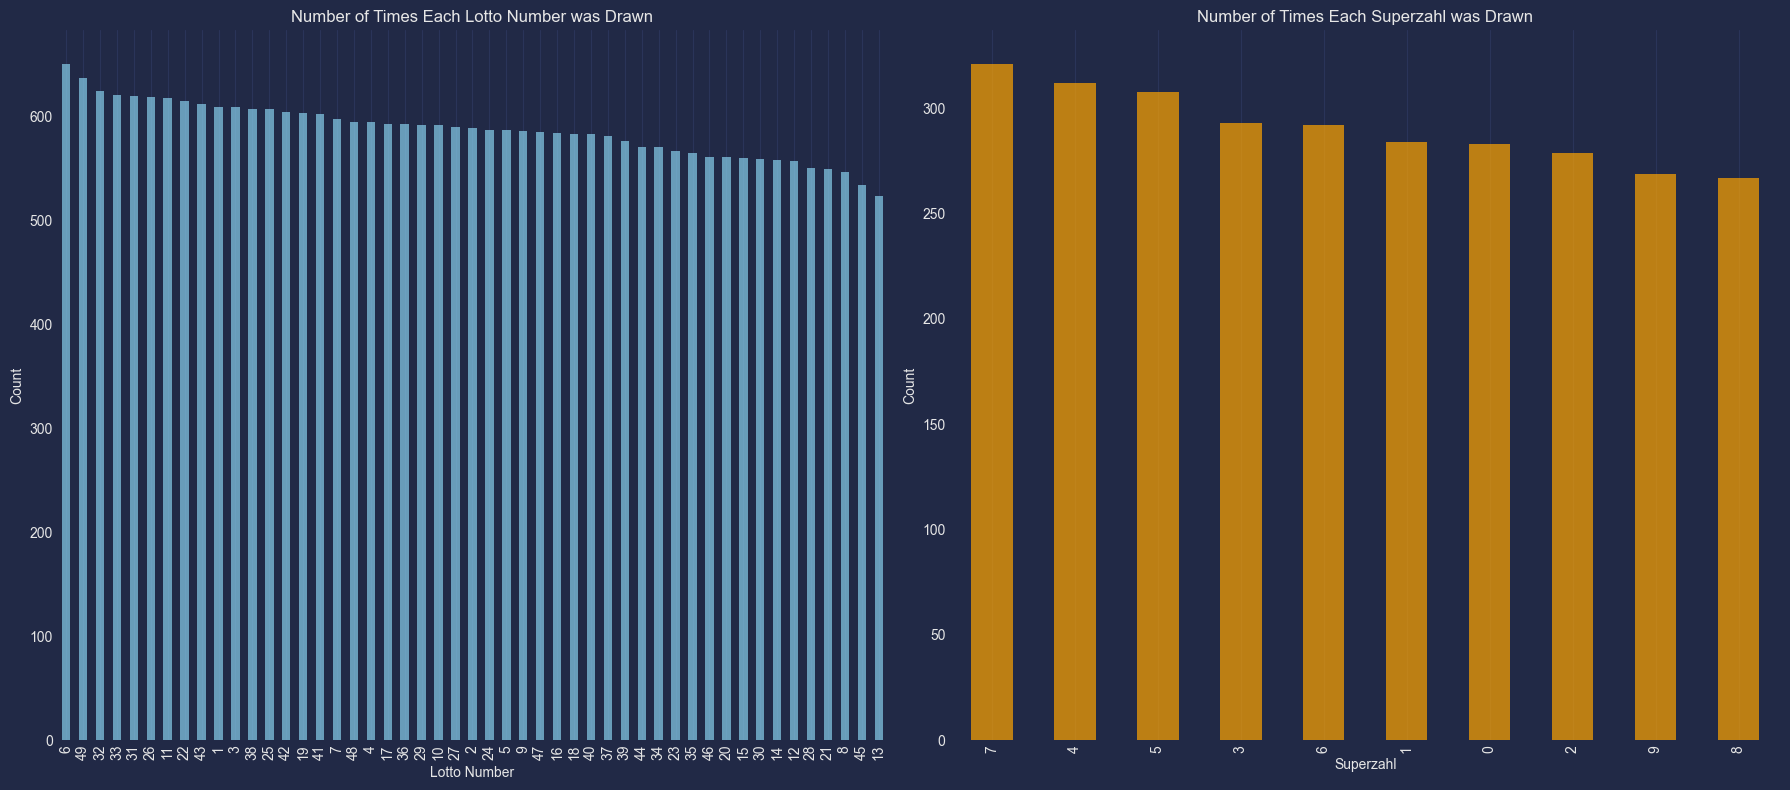

In [61]:
# Plot the counts of each number
plt.figure(figsize=(18, 8))

# Plot Lottozahl counts
plt.subplot(1, 2, 1)
number_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Times Each Lotto Number was Drawn')
plt.xlabel('Lotto Number')
plt.ylabel('Count')
plt.grid(axis='y')

# Plot Superzahl counts
plt.subplot(1, 2, 2)
superzahl_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Times Each Superzahl was Drawn')
plt.xlabel('Superzahl')
plt.ylabel('Count')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

### Frequency Analysis Model for Tipping